In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# EDA on Earnings Call on 2010 - 2016

In [3]:
# Load the data
df = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Calls\calls_short.csv')
df.head()

,company,sector,year,quarter,date,transcript
0,ALV,automobiles,2011,2,2009-07-21,Operator: Good day and welcome to the Autoliv ...
1,ALV,automobiles,2011,3,2011-07-21,"Operator: Good afternoon, ladies and gentlemen..."
2,ALV,automobiles,2011,4,2011-10-25,Operator: Good day and welcome to the Q4 resul...
3,ALV,automobiles,2012,1,2012-02-01,Operator: Good day ladies and gentlemen and we...
4,ALV,automobiles,2012,2,2012-04-27,Operator: Good Day and welcome to the Q2 2012 ...


In [5]:
# Some basic information
print(df.shape)
print(df.columns)
df["date"] = pd.to_datetime(df["date"])

(24580, 6)
Index(['company', 'sector', 'year', 'quarter', 'date', 'transcript'], dtype='object')


## Distribution of Call Dates

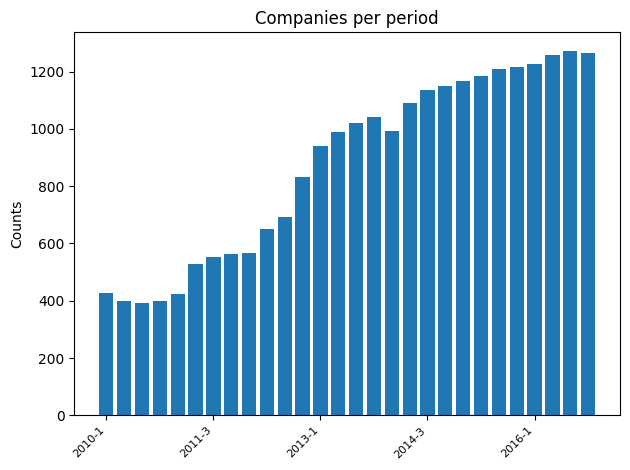

In [16]:
company_by_date = []
group_yq = df.groupby(["year", "quarter"])["company"].nunique().reset_index()
group_yq["period"] = group_yq['year'].astype(str) + "-" + group_yq['quarter'].astype(str)
n = 6


plt.bar(group_yq['period'].tolist(), group_yq['company'].tolist())
plt.title("Companies per period")
plt.ylabel('Counts')
plt.xticks([i for i in range(len(group_yq["period"])) if i % n == 0], 
           [label for i, label in enumerate(group_yq["period"]) if i % n == 0],
           rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

## Distribution of Sector

Total Number of companies: 1322


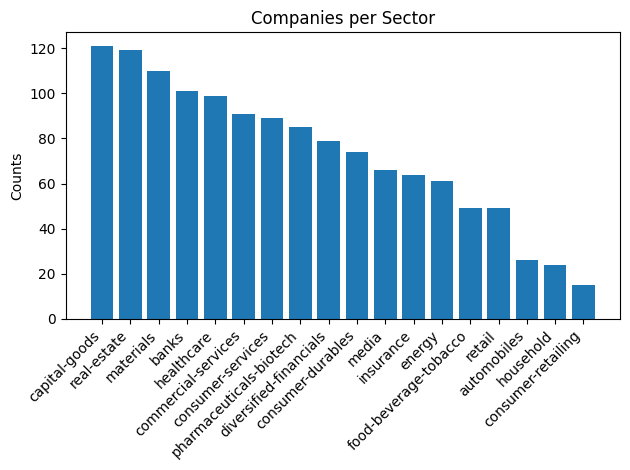

In [19]:
print("Total Number of companies:", df["company"].nunique())

company_in_sector = []
for sector in df["sector"].unique():
    d = df[df["sector"]==sector]
    company_in_sector.append(d.company.nunique())

# Rank by count in decreasing order
combined_data = sorted(zip(list(df["sector"].unique()), company_in_sector), key=lambda x: x[1], reverse=True)
sorted_sector, sorted_count = zip(*combined_data)

plt.bar(sorted_sector, sorted_count)
plt.title("Companies per Sector")
plt.ylabel('Counts')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

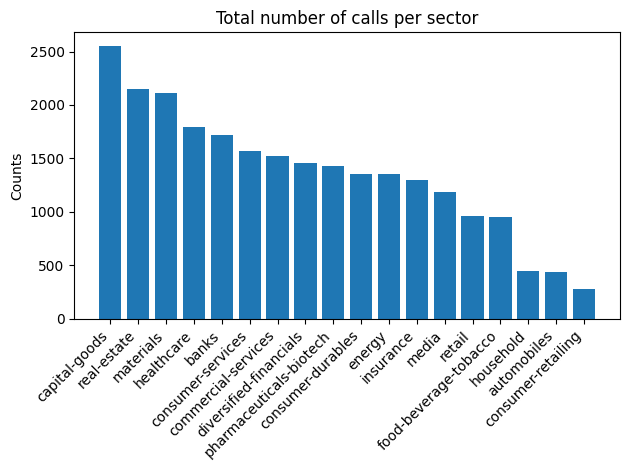

In [20]:

sector_count = df["sector"].value_counts()
plt.bar(list(sector_count.index), list(sector_count.values))
plt.title("Total number of calls per sector")
plt.ylabel('Counts')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Investigate in the discrepancy between year/quarter and date

In [6]:
df.describe()

,year,quarter,date
count,24580.000000,24580.00000,24580
mean,2013.701627,2.54764,2013-11-26 13:58:02.831570432
min,2010.000000,1.00000,2006-01-10 00:00:00
25%,2012.000000,2.00000,2012-07-31 00:00:00
50%,2014.000000,3.00000,2014-03-11 00:00:00
75%,2015.000000,4.00000,2015-08-01 00:00:00
max,2016.000000,4.00000,2017-04-06 00:00:00
std,1.827832,1.11416,NaN


In [5]:
df.sort_values(by = "date").head()

,company,sector,year,quarter,date,transcript
19406,MANU,media,2014,1,2006-01-10,"Operator: Good day, ladies and gentlemen, and ..."
24260,FLWS,retail,2010,1,2006-01-28,Operator: Good day everyone and welcome to the...
19330,IMAX,media,2010,1,2006-03-10,Operator: Welcome to IMAX Corporation’s first ...
19964,WMG,media,2014,3,2006-05-05,Operator: Welcome to Warner Music Group’s Q3 2...
19331,IMAX,media,2010,2,2006-05-09,Operator: Good day. And welcome to IMAX Corpor...


In [25]:
df.iloc[19404:19410]

,company,sector,year,quarter,date,transcript
19404,LYV,media,2016,3,2016-05-04,"Operator: Good afternoon. My name is Cody, and..."
19405,LYV,media,2016,4,2016-07-29,"Operator: Good afternoon. My name is Christy, ..."
19406,MANU,media,2014,1,2006-01-10,"Operator: Good day, ladies and gentlemen, and ..."
19407,MANU,media,2014,2,2013-02-15,"Operator: Good day, ladies and gentlemen, and ..."
19408,MANU,media,2014,3,2013-05-02,"Operator: Good day, ladies and gentlemen. Than..."
19409,MANU,media,2014,4,2013-09-18,"Operator: Good day, ladies and gentlemen, and ..."


In [26]:
df.iloc[19962:19967] 

,company,sector,year,quarter,date,transcript
19962,WB,media,2016,3,2016-11-22,"Operator: Ladies and gentlemen, thank you for ..."
19963,WB,media,2016,4,2017-02-23,"Operator: Ladies and gentlemen, thank you for ..."
19964,WMG,media,2014,3,2006-05-05,Operator: Welcome to Warner Music Group’s Q3 2...
19965,WMG,media,2015,1,2006-12-01,Operator: Welcome to the Warner Music Group's ...
19966,WWE,media,2010,1,2010-02-11,"Operator: Good morning. My name is Cayce, and ..."


In [27]:
def match_date(year, quarter):
    # Assign 1st quarter to Feb, 2nd to May, 3rd to Aug, 4th to Nov
    month = (quarter-1)*3 + 2
    matched_date = f"{year}-{month:02d}-01"
    return matched_date

matched_date = df.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation = df.date - matched_date
deviation.describe()

count                            24580
mean     -128 days +07:32:02.148087876
std        285 days 15:39:53.767197520
min               -3109 days +00:00:00
25%                -128 days +00:00:00
50%                 -35 days +00:00:00
75%                 -13 days +00:00:00
max                  163 days 00:00:00
dtype: object

### Examine the actually transcript in the mismatched case

In [34]:
# All transcript matched with date/quarter columns
display(df.sort_values(by = "date").head())
print(df.iloc[19406, -1][:150])
print(df.iloc[24260, -1][:150])
print(df.iloc[19330, -1][:150])
print(df.iloc[19964, -1][:150])
print(df.iloc[19331, -1][:150])

,company,sector,year,quarter,date,transcript
19406,MANU,media,2014,1,2006-01-10,"Operator: Good day, ladies and gentlemen, and ..."
24260,FLWS,retail,2010,1,2006-01-28,Operator: Good day everyone and welcome to the...
19330,IMAX,media,2010,1,2006-03-10,Operator: Welcome to IMAX Corporation’s first ...
19964,WMG,media,2014,3,2006-05-05,Operator: Welcome to Warner Music Group’s Q3 2...
19331,IMAX,media,2010,2,2006-05-09,Operator: Good day. And welcome to IMAX Corpor...


Operator: Good day, ladies and gentlemen, and thank you for standing by. Welcome to the Manchester United, first-quarter 2014 earnings conference call
Operator: Good day everyone and welcome to the 1-800-Flowers.Com Inc. fiscal 2011 first quarter results conference call. This call is being recorded. 
Operator: Welcome to IMAX Corporation’s first quarter earnings conference call. Today's call is being recorded. At this time, I would like to turn the
Operator: Welcome to Warner Music Group’s Q3 2014 Earnings Call for the period ended June 30, 2014. At the request of Warner Music Group today’s call 
Operator: Good day. And welcome to IMAX Corporation’s Second Quarterly Earnings Conference Call. Today’s conference is being recorded. At this time, I


In [66]:
display(df.sort_values(by = "date", ascending = False).head())
display(df[df.company == "BBBY"])
print(df[df.date == df.date.max()].iloc[0, -1][:150])

,company,sector,year,quarter,date,transcript
23843,BBBY,retail,2016,4,2017-04-06,Operator: Welcome to the Bed Bath & Beyond's f...
6849,LULU,consumer-durables,2016,4,2017-03-30,Operator: Thank you for standing by. This is t...
7123,OXM,consumer-durables,2016,4,2017-03-24,"Operator: Good day, ladies and gentlemen, and ..."
24339,GME,retail,2016,4,2017-03-24,Operator: Good day and welcome to GameStop Cor...
20199,ASND,pharmaceuticals-biotech,2016,4,2017-03-23,Operator: Welcome everyone to the Ascendis Pha...


,company,sector,year,quarter,date,transcript
23819,BBBY,retail,2010,1,2009-01-08,Operator: Welcome to Bed Bath & Beyond's first...
23820,BBBY,retail,2010,2,2009-07-24,Operator: Welcome to Bed Bath and Beyond’s thi...
23821,BBBY,retail,2011,1,2010-06-23,Operator: Welcome to Bed Bath & Beyond's First...
23822,BBBY,retail,2011,2,2011-06-22,Operator: Welcome to Bed Bath & Beyond's Secon...
23823,BBBY,retail,2011,3,2011-09-21,Operator: Welcome to Bed Bath & Beyond's Third...
23824,BBBY,retail,2011,4,2011-12-21,"Operator: Good day, and welcome to Bed Bath & ..."
23825,BBBY,retail,2012,1,2012-04-04,Operator: Welcome to Bed Bath & Beyond's First...
23826,BBBY,retail,2012,2,2012-06-20,Operator: Welcome to Bed Bath & Beyond's Secon...
23827,BBBY,retail,2012,4,2013-04-10,Operator: Welcome to Bed Bath & Beyond's Fisca...
23828,BBBY,retail,2013,1,2013-06-26,Operator: Welcome to Bed Bath & Beyond's First...


Operator: Welcome to the Bed Bath & Beyond's fourth quarter fiscal 2016 earnings call. All participants will be in listen-only mode until the Q&A port


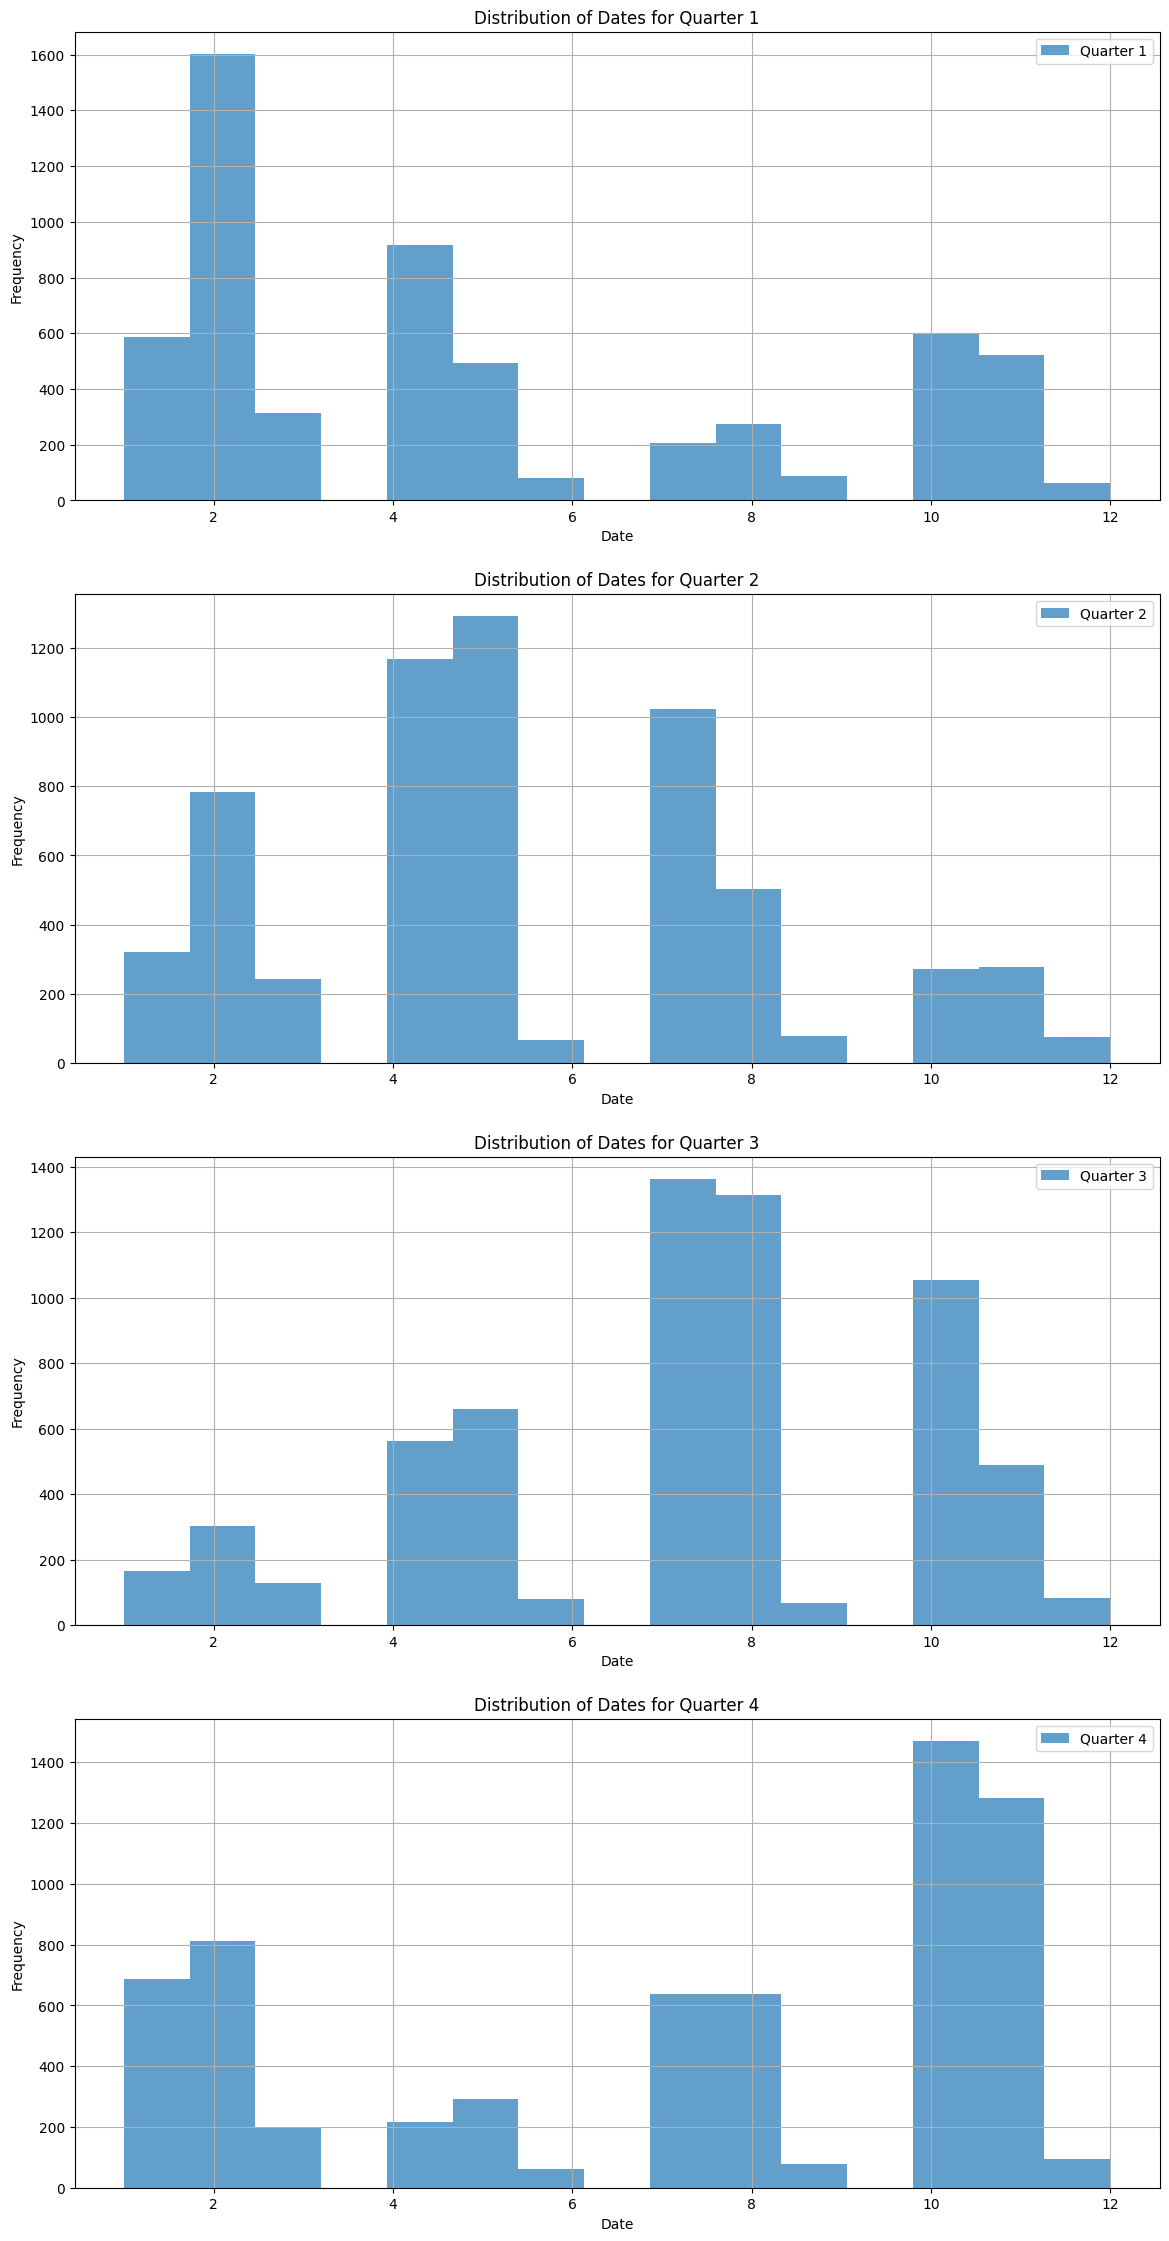

In [7]:
quarterdf = pd.DataFrame({"quarter": df.quarter, "month": df.date.dt.month})
quarter_group = quarterdf.groupby("quarter")["month"]
fig, axs = plt.subplots(4, 1, figsize=(14, 28))
for ax, quarter in zip(axs, [1, 2, 3, 4]):
    dates = quarter_group.get_group(quarter)
    ax.hist(dates, bins=15, alpha=0.7, label=f'Quarter {quarter}')
    ax.legend()
    ax.set_title(f'Distribution of Dates for Quarter {quarter}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Frequency')
    ax.grid()
plt.show()

In [8]:
reduced_df = df[df.date >= pd.to_datetime("2010-01-01")]
reduced_df.date.describe()

count                            23413
mean     2014-02-21 18:30:49.741596416
min                2010-01-06 00:00:00
25%                2012-11-05 00:00:00
50%                2014-05-01 00:00:00
75%                2015-08-06 00:00:00
max                2017-04-06 00:00:00
Name: date, dtype: object

In [13]:
display(reduced_df.sort_values(by = "date").head())
display(reduced_df[reduced_df.company == "MOS"])
df.iloc[18027, -1][:120]

,company,sector,year,quarter,date,transcript
18333,RPM,materials,2010,3,2010-01-06,Operator: Welcome to RPM International’s confe...
6059,TISI,commercial-services,2010,3,2010-01-06,Operator: Good morning and welcome to the Team...
18026,MOS,materials,2010,4,2010-01-06,"Operator: Good morning ladies and gentlemen, a..."
13358,ANGO,healthcare,2010,3,2010-01-06,"Operator: Good day, ladies and gentlemen, than..."
12729,LNDC,food-beverage-tobacco,2010,3,2010-01-06,Operator: Welcome to the Landec third quarter ...


,company,sector,year,quarter,date,transcript
18026,MOS,materials,2010,4,2010-01-06,"Operator: Good morning ladies and gentlemen, a..."
18027,MOS,materials,2011,1,2010-04-02,"Operator: Good morning, ladies and gentlemen, ..."
18028,MOS,materials,2011,2,2010-07-23,Operator: Good morning ladies and gentlemen an...
18029,MOS,materials,2011,3,2010-10-05,"Operator: Good morning, ladies and gentlemen, ..."
18030,MOS,materials,2011,4,2011-01-05,"Operator: Good morning, ladies and gentlemen, ..."
18031,MOS,materials,2012,1,2011-03-31,"Operator: Good morning, ladies and gentlemen, ..."
18032,MOS,materials,2012,2,2011-07-19,"Operator: Good morning, ladies and gentlemen, ..."
18033,MOS,materials,2012,3,2011-09-29,"Operator: Good morning, ladies and gentlemen, ..."
18034,MOS,materials,2012,4,2012-01-05,"Operator: Good morning, ladies and gentlemen, ..."
18035,MOS,materials,2013,1,2012-03-29,Operator: Good morning ladies and gentlemen an...


"Operator: Good morning, ladies and gentlemen, and welcome to The Mosaic Company's fiscal 2011 first quarter earnings con"

#### EDA on the transcripts

count     24580.000000
mean      45965.131001
std       14179.014884
min        4618.000000
25%       36041.750000
50%       46902.000000
75%       55483.000000
max      208774.000000
Name: transcript, dtype: float64

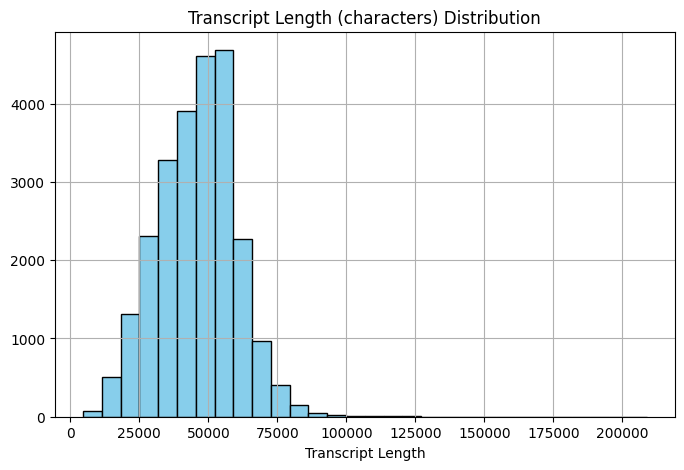

In [17]:
# Text Length Distribution
display(df['transcript'].str.len().describe())
length_char = df['transcript'].str.len()
plt.figure(figsize=(8, 5))
plt.hist(length_char, bins=30, color='skyblue', edgecolor='black')
plt.title('Transcript Length (characters) Distribution')
plt.xlabel('Transcript Length')
plt.grid(True)
plt.show()

In [18]:
from nltk.tokenize import word_tokenize
def count_words(tokens):
    tokens = [word.lower() for word in tokens if word.isalpha()]
    return len(tokens)

length_word = df['transcript'].apply(word_tokenize).len()
plt.figure(figsize=(8, 5))
plt.hist(length_word, bins=30, color='skyblue', edgecolor='black')
plt.title('Transcript Length (words) Distribution')
plt.xlabel('Transcript Length (words)')
plt.grid(True)
plt.show()

In [76]:
# Shortest call - still completed data
print(df[df.transcript.str.len() == df.transcript.str.len().min()].iloc[0,-1])

Operator: Good day, everyone, and welcome to the Credit Acceptance Corporation Third Quarter 2013 Earnings Conference Call. Today's call is being recorded. A webcast and transcript of today's call will be made available on Credit Acceptance's website. At this time, I would like to turn the call over to Credit Acceptance Senior Vice President and Treasurer, Doug Busk.
Douglas W. Busk: Thank you, Sam. Good afternoon and welcome to the Credit Acceptance Corporation Third Quarter 2013 Earnings Call. As you read our news release posted on the Investor Relations section of our website at creditacceptance.com, and as you listen to this conference call, please recognize that both contain forward-looking statements within the meaning of Federal Securities laws. These forward-looking statements are subject to a number of risks and uncertainties, many of which are beyond our control and which could cause actual results to differ materially from such statements. These risks and uncertainties inclu